In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
#from xgboost import XGBClassifier
#from sklearn.externals import joblib

In [2]:
df=pd.read_csv('parkinsons.data')
df.to_csv('parkinsons.csv', index = None)

In [3]:
#import data from excel csv sheet
df=pd.read_csv('parkinsons.csv')
#show first 5 rows of data
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 24
Number of Instances In Dataset :  195


In [5]:
df_copy = df.copy(deep=True)

In [6]:
# Dropping The Name Column

df_copy.drop(['name'], axis=1, inplace=True)

In [7]:
print('Number of Features In Dataset :', df_copy.shape[1])
print('Number of Instances In Dataset : ', df_copy.shape[0])

Number of Features In Dataset : 23
Number of Instances In Dataset :  195


In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [9]:
df_copy.status = df_copy.status.astype(float)

In [10]:
df_copy.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [11]:
df_copy.rename(columns={'MDVP:Fo(Hz)': 'MDVP_Fo', 'MDVP:Fhi(Hz)': 'MDVP_Fhi', 'MDVP:Flo(Hz)': 'MDVP_Flo','MDVP:Jitter(%)': 'MDVP_Jitter_Perc','MDVP:Jitter(Abs)': 'MDVP_Jitter_Abs','MDVP:RAP': 'MDVP_RAP','MDVP:PPQ': 'MDVP_PPQ','Jitter:DDP': 'Jitter_DDP','MDVP:Shimmer': 'MDVP_Shimmer', 'MDVP:Shimmer(dB)': 'MDVP_Shimmer_dB','Shimmer:APQ3': 'Shimmer_APQ3','Shimmer:APQ5': 'Shimmer_APQ5','MDVP:APQ': 'MDVP_APQ','Shimmer:DDA': 'Shimmer_DDA'}, inplace=True)

In [12]:
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',df_copy.duplicated().sum())

Number of Duplicated Rows : 0


In [13]:
df_copy.isna().sum()

MDVP_Fo             0
MDVP_Fhi            0
MDVP_Flo            0
MDVP_Jitter_Perc    0
MDVP_Jitter_Abs     0
MDVP_RAP            0
MDVP_PPQ            0
Jitter_DDP          0
MDVP_Shimmer        0
MDVP_Shimmer_dB     0
Shimmer_APQ3        0
Shimmer_APQ5        0
MDVP_APQ            0
Shimmer_DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

EDA

<AxesSubplot:xlabel='status', ylabel='count'>

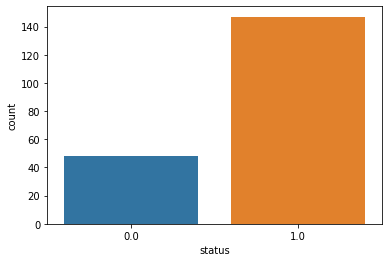

In [14]:
#Balance of Data
sns.countplot(x='status',data=df_copy)

In [15]:
df_copy.groupby("status").mean()

,MDVP_Fo,MDVP_Fhi,MDVP_Flo,MDVP_Jitter_Perc,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,MDVP_APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0.0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1.0,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


Observations:

Here we can clearly observe that peoples with Parkinsons disease have

less MDVP:Fo(Hz) value (around 145.180762),

less MDVP:Fhi(Hz) value (around 188.441463),

less MDVP:Flo(Hz) value (around 106.893558),

relatively high MDVP:Jitter(%) value (around 0.006989),

relatively high MDVP:Jitter(Abs) value (around 0.000051),

relatively high MDVP:RAP value (around 0.003757),

relatively high MDVP:PPQ value (around 0.003900),

relatively high Jitter:DDP value (around 0.011273),

relatively high MDVP:Shimmer value (around 0.033658),

relatively high MDVP:Shimmer(dB) value (around 0.321204),

relatively high Shimmer:APQ3 value (around 0.017676),

relatively high Shimmer:APQ5 value (around 0.020285),

relatively high MDVP:APQ value (around 0.027600),

relatively high Shimmer:DDA value (around 0.053027),

relatively high NHR value (around 0.029211),

less HNR value (around 20.974048),

relatively high RPDE value (around 0.516816),

relatively high DFA value (around 0.725408),

relatively high spread1 value (around -5.333420),

relatively high spread2 value (around 0.248133),

relatively high D2 value (around 2.456058), and

relatively high PPE value (around 0.233828)

Observations: This distinction can be used for making prediction. So this understanding will be found automatically by our Machine Learning Model.

<AxesSubplot:>

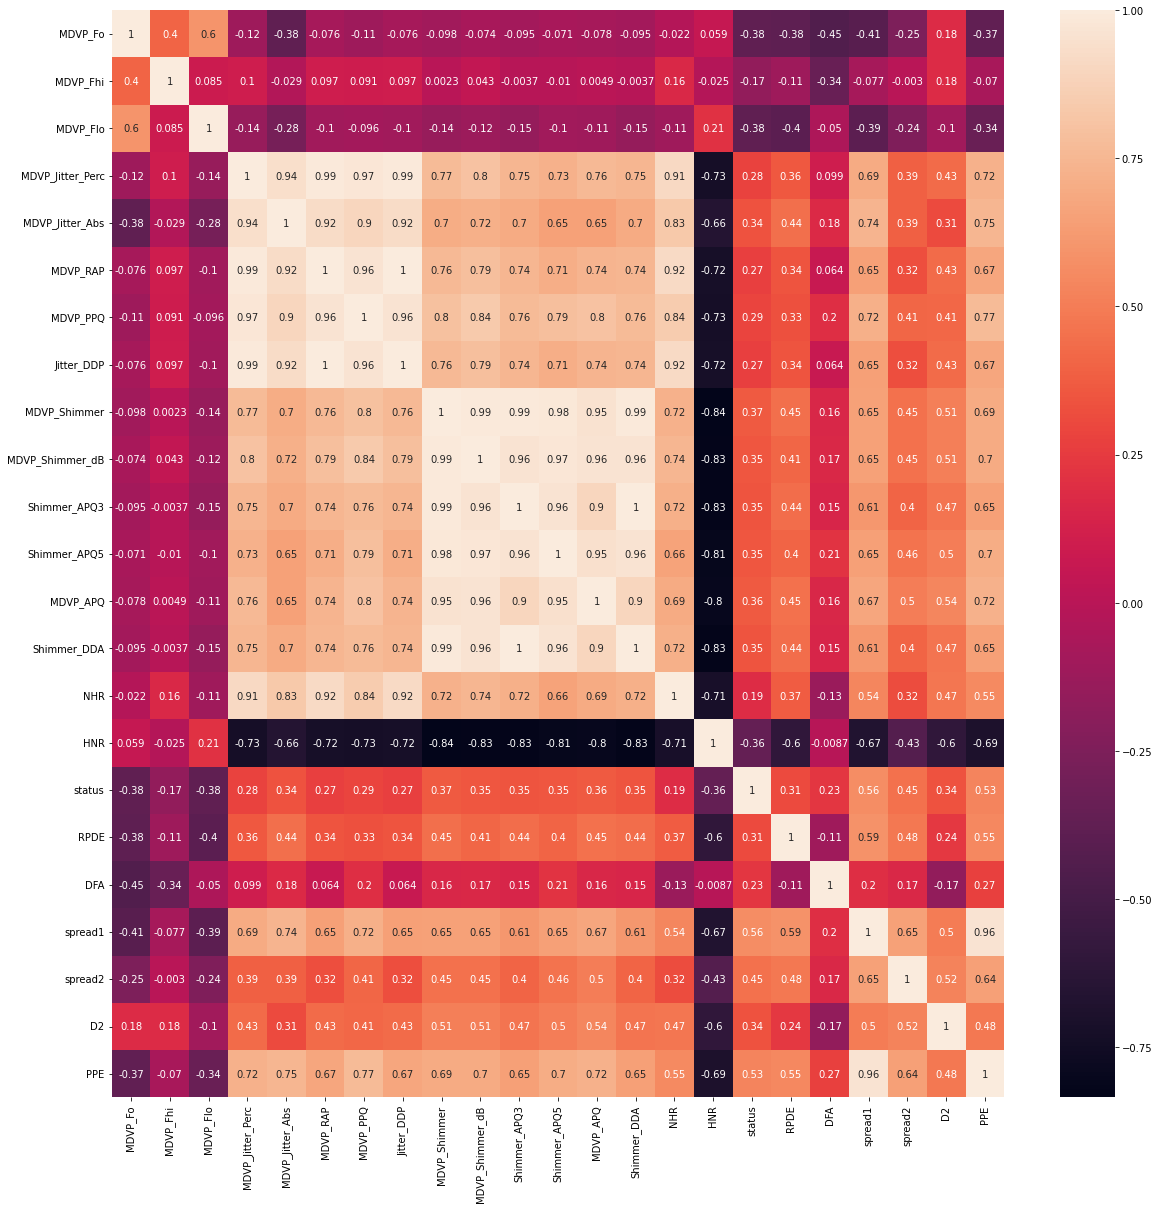

In [16]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df_copy.corr(),annot=True,ax=ax)


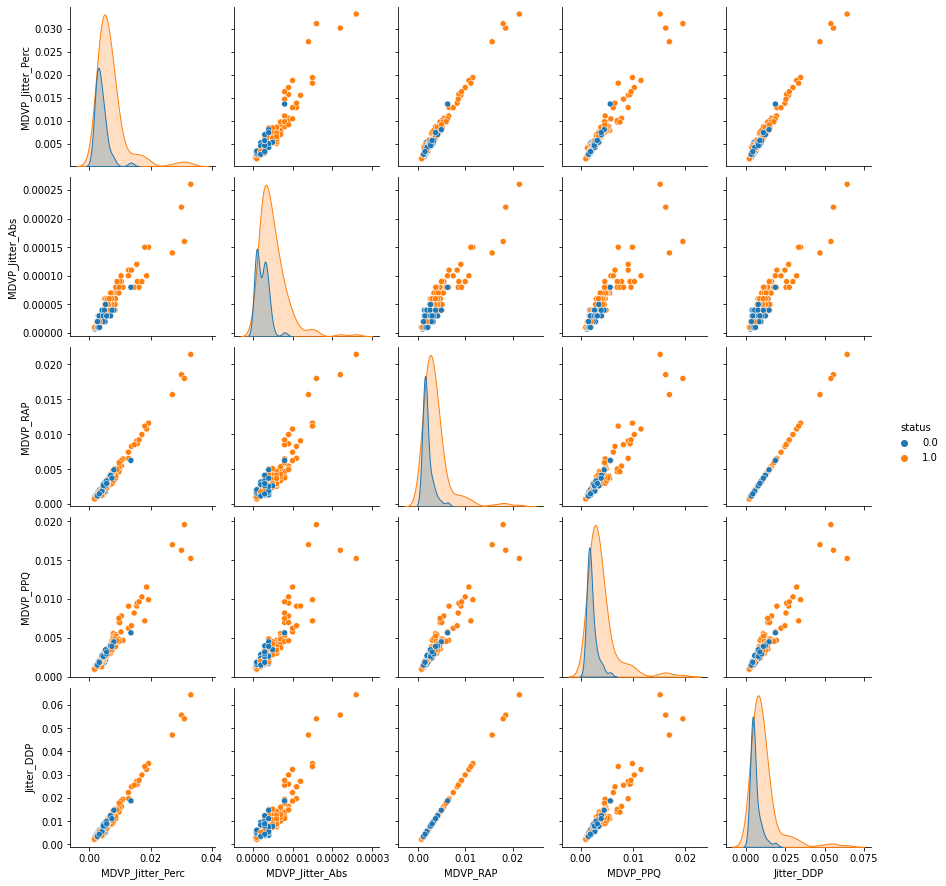

In [17]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df_copy,hue = 'status', vars = ['MDVP_Jitter_Perc','MDVP_Jitter_Abs','MDVP_RAP','MDVP_PPQ', 'Jitter_DDP'] )
plt.show()

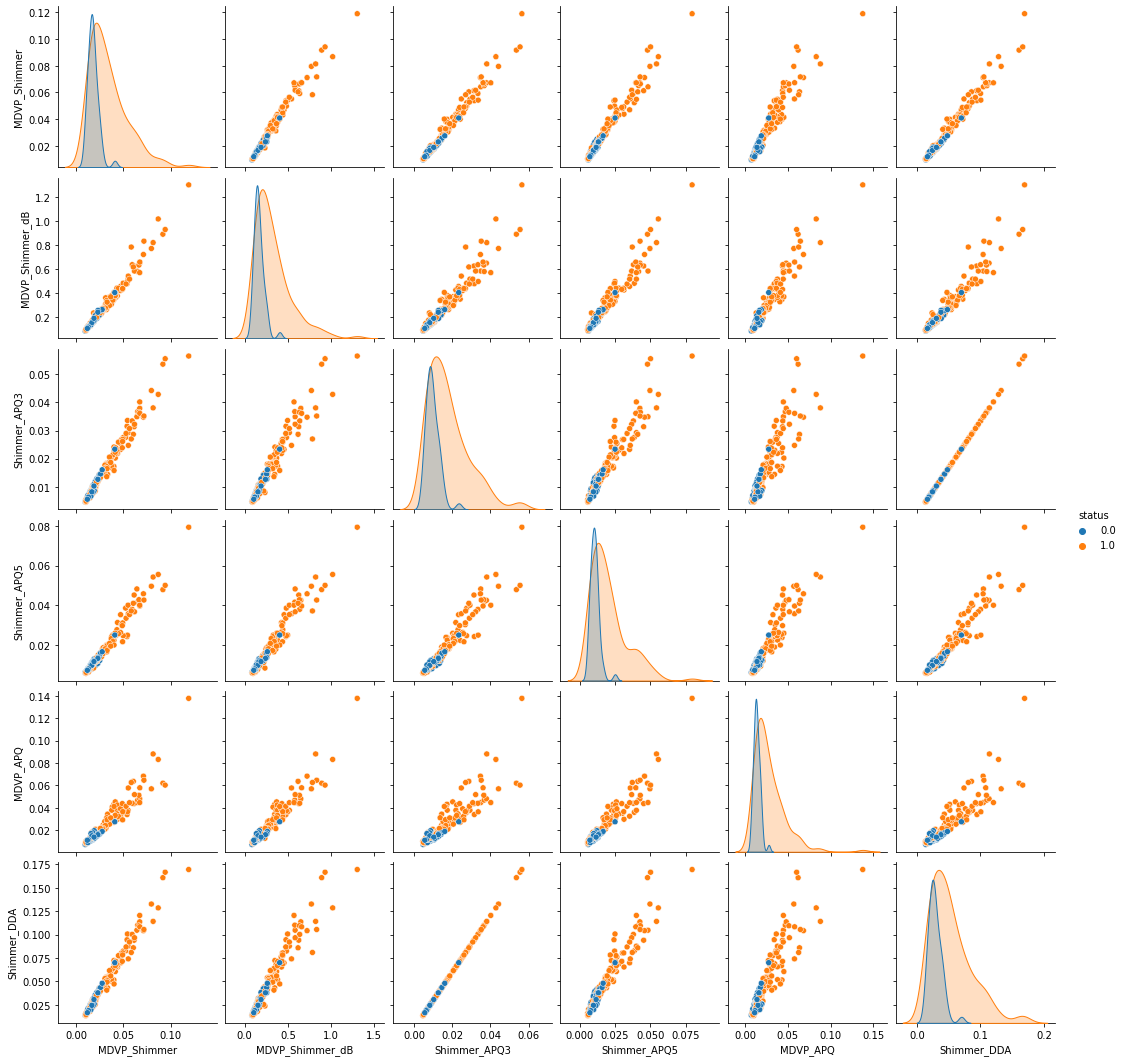

In [18]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df_copy,hue = 'status', vars = ['MDVP_Shimmer','MDVP_Shimmer_dB','Shimmer_APQ3','Shimmer_APQ5','MDVP_APQ','Shimmer_DDA'] )
plt.show()

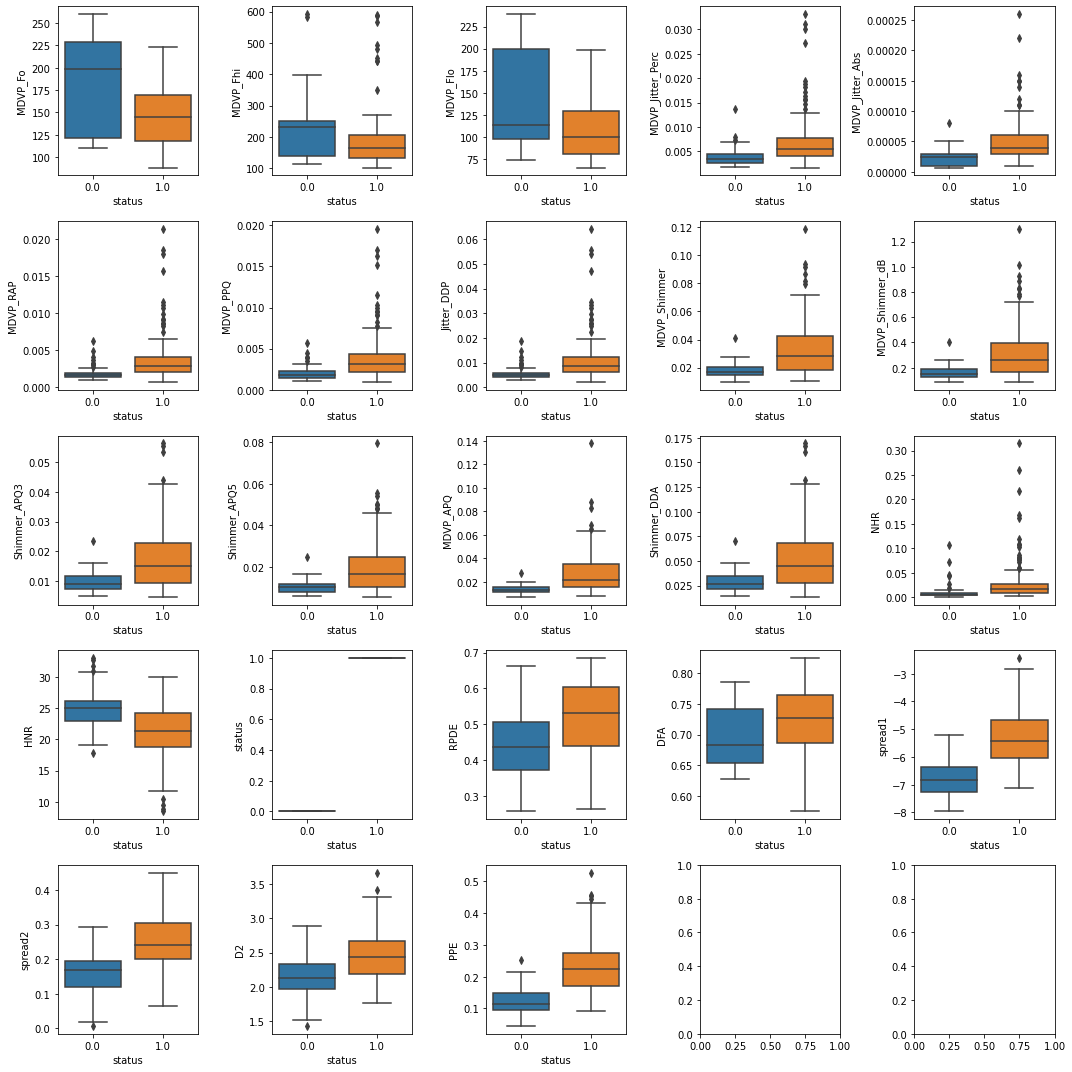

In [19]:
#Box Plot
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(0,len(df_copy.columns)):
    sns.boxplot(x='status',y=df_copy.iloc[:,i],data=df_copy,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

In [20]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.1)
    quartile3 = dataframe[variable].quantile(0.9)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [21]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")

In [22]:
for col in df_copy.columns:
    has_outliers(df_copy, col)

MDVP_Fhi yes
MDVP_Jitter_Perc yes
MDVP_Jitter_Abs yes
MDVP_RAP yes
MDVP_PPQ yes
Jitter_DDP yes
MDVP_Shimmer_dB yes
MDVP_APQ yes
NHR yes


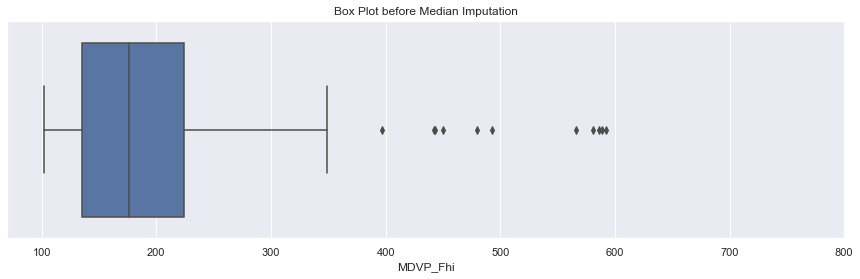

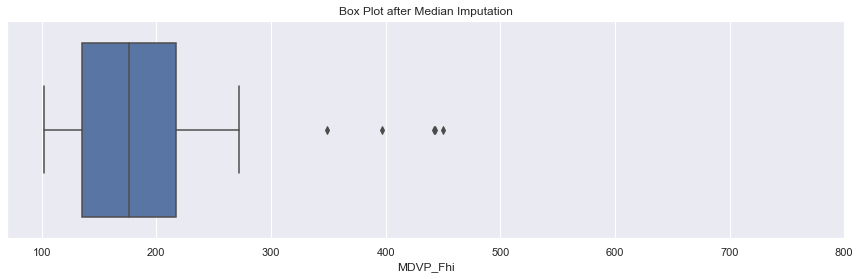

In [23]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= df_copy.MDVP_Fhi)
plt.xlim([70,800])
plt.title("Box Plot before Median Imputation")
plt.show()  

q1 = df_copy.MDVP_Fhi.quantile(0.1)
q3 = df_copy.MDVP_Fhi.quantile(0.9)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_copy.MDVP_Fhi)
for i in df_copy.MDVP_Fhi:
    if i > Upper_tail or i < Lower_tail:
            df_copy.MDVP_Fhi = df_copy.MDVP_Fhi.replace(i, med)

sns.boxplot(x= df_copy.MDVP_Fhi)
plt.xlim([70,800])
plt.title("Box Plot after Median Imputation")
plt.show()  

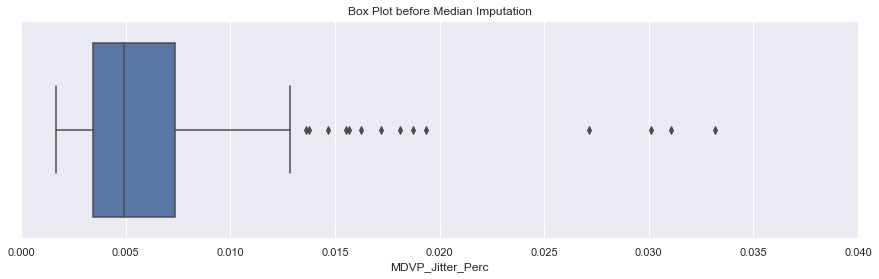

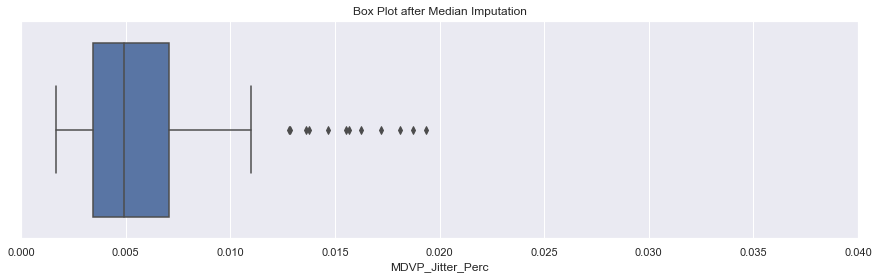

In [24]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= df_copy.MDVP_Jitter_Perc)
plt.xlim([0,0.040])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df_copy.MDVP_Jitter_Perc.quantile(0.1)
q3 = df_copy.MDVP_Jitter_Perc.quantile(0.9)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_copy.MDVP_Jitter_Perc)
for i in df_copy.MDVP_Jitter_Perc:
    if i > Upper_tail or i < Lower_tail:
            df_copy.MDVP_Jitter_Perc = df_copy.MDVP_Jitter_Perc.replace(i, med)
sns.boxplot(x= df_copy.MDVP_Jitter_Perc)
plt.xlim([0,0.040])
plt.title("Box Plot after Median Imputation")
plt.show()

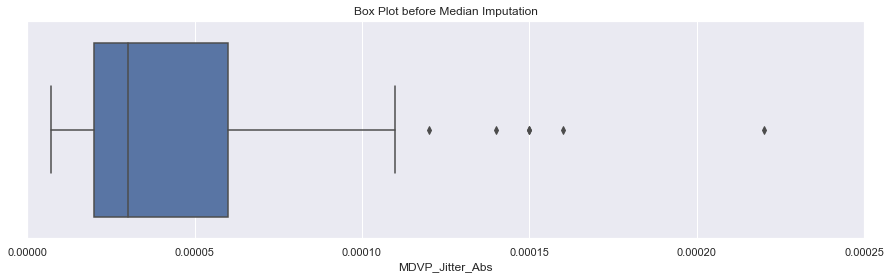

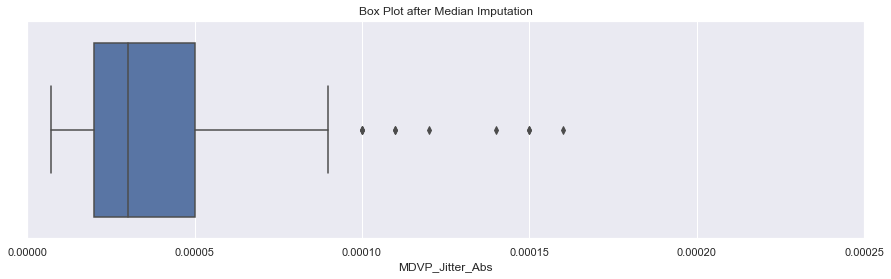

In [25]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= df_copy.MDVP_Jitter_Abs)
plt.xlim([0.00000,0.00025])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df_copy.MDVP_Jitter_Abs.quantile(0.1)
q3 = df_copy.MDVP_Jitter_Abs.quantile(0.9)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_copy.MDVP_Jitter_Abs)
for i in df_copy.MDVP_Jitter_Abs:
    if i > Upper_tail or i < Lower_tail:
            df_copy.MDVP_Jitter_Abs = df_copy.MDVP_Jitter_Abs.replace(i, med)
sns.boxplot(x= df_copy.MDVP_Jitter_Abs)
plt.xlim([0.00000,0.00025])
plt.title("Box Plot after Median Imputation")
plt.show() 

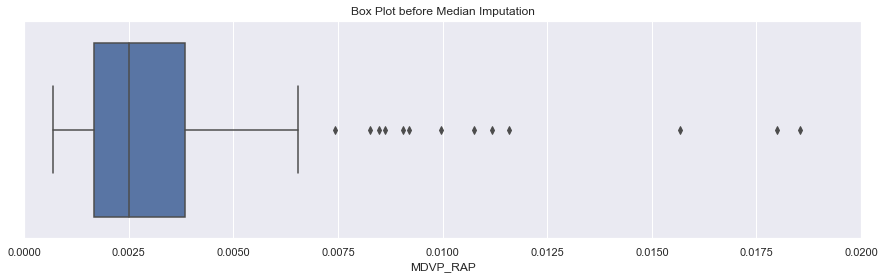

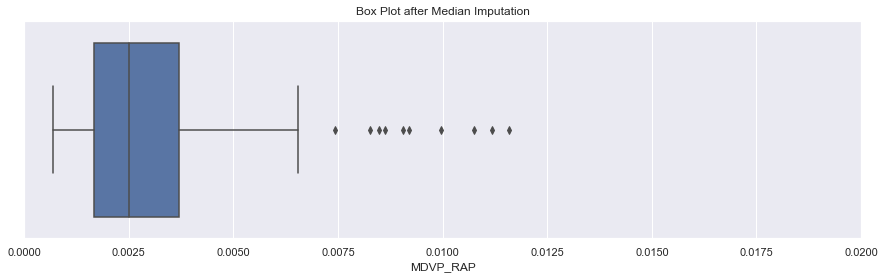

In [26]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= df_copy.MDVP_RAP)
plt.xlim([0,0.020])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df_copy.MDVP_RAP.quantile(0.1)
q3 = df_copy.MDVP_RAP.quantile(0.9)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_copy.MDVP_RAP)
for i in df_copy.MDVP_RAP:
    if i > Upper_tail or i < Lower_tail:
            df_copy.MDVP_RAP = df_copy.MDVP_RAP.replace(i, med)
sns.boxplot(x= df_copy.MDVP_RAP)
plt.xlim([0,0.020])
plt.title("Box Plot after Median Imputation")
plt.show() 

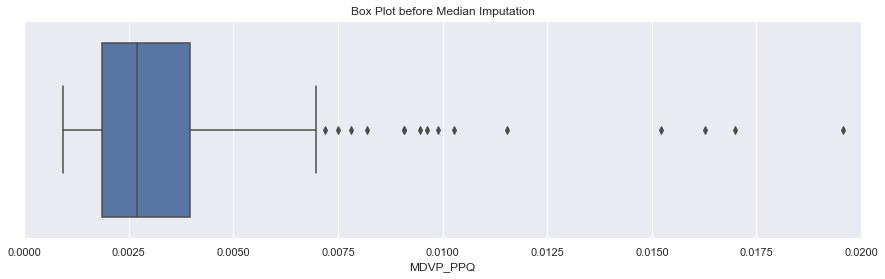

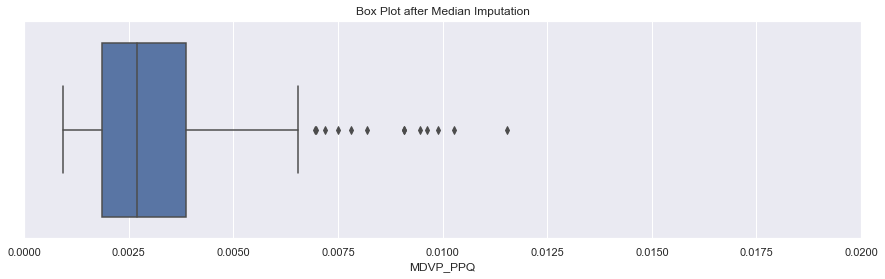

In [27]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= df_copy.MDVP_PPQ)
plt.xlim([0,0.020])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df_copy.MDVP_PPQ.quantile(0.1)
q3 = df_copy.MDVP_PPQ.quantile(0.9)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_copy.MDVP_PPQ)
for i in df_copy.MDVP_PPQ:
    if i > Upper_tail or i < Lower_tail:
            df_copy.MDVP_PPQ = df_copy.MDVP_PPQ.replace(i, med)
sns.boxplot(x= df_copy.MDVP_PPQ)
plt.xlim([0,0.020])
plt.title("Box Plot after Median Imputation")
plt.show() 

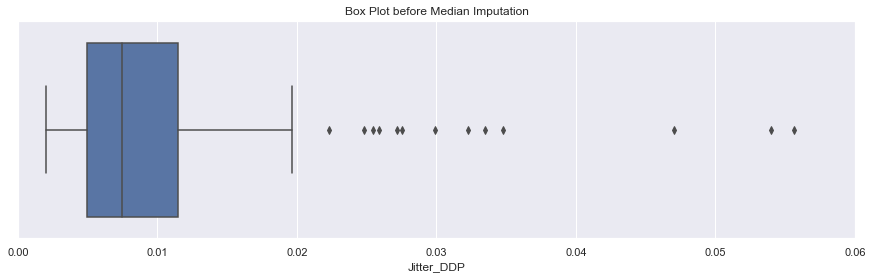

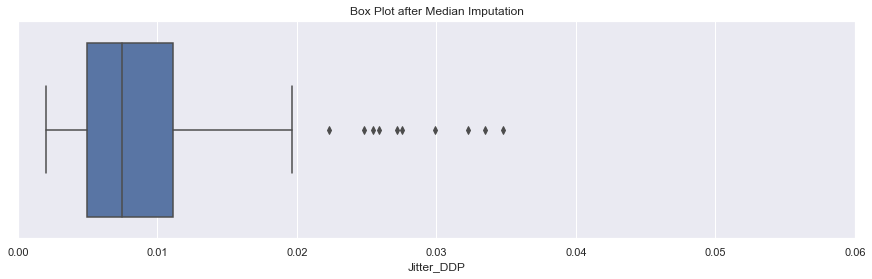

In [28]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= df_copy.Jitter_DDP)
plt.xlim([0,0.06])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df_copy.Jitter_DDP.quantile(0.1)
q3 = df_copy.Jitter_DDP.quantile(0.9)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_copy.Jitter_DDP)
for i in df_copy.Jitter_DDP:
    if i > Upper_tail or i < Lower_tail:
            df_copy.Jitter_DDP = df_copy.Jitter_DDP.replace(i, med)
sns.boxplot(x= df_copy.Jitter_DDP)
plt.xlim([0,0.06])
plt.title("Box Plot after Median Imputation")
plt.show() 

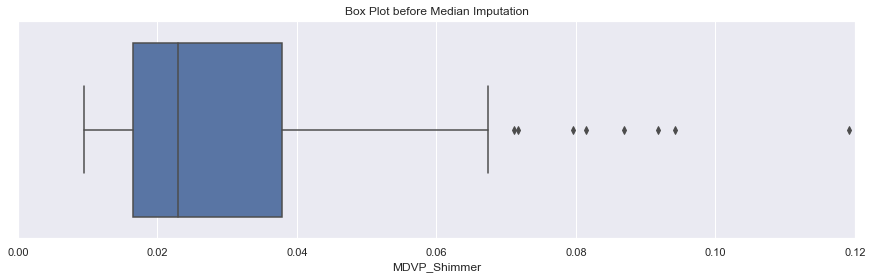

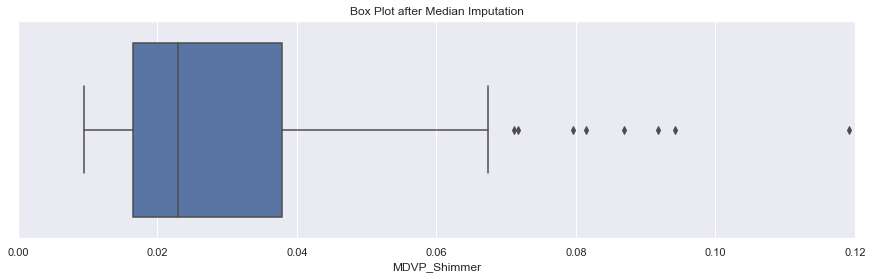

In [29]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= df_copy.MDVP_Shimmer)
plt.xlim([0,0.12])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df_copy.MDVP_Shimmer.quantile(0.1)
q3 = df_copy.MDVP_Shimmer.quantile(0.9)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_copy.MDVP_Shimmer)
for i in df_copy.MDVP_Shimmer:
    if i > Upper_tail or i < Lower_tail:
            df_copy.MDVP_Shimmer = df_copy.MDVP_Shimmer.replace(i, med)
sns.boxplot(x= df_copy.MDVP_Shimmer)
plt.xlim([0,0.12])
plt.title("Box Plot after Median Imputation")
plt.show() 

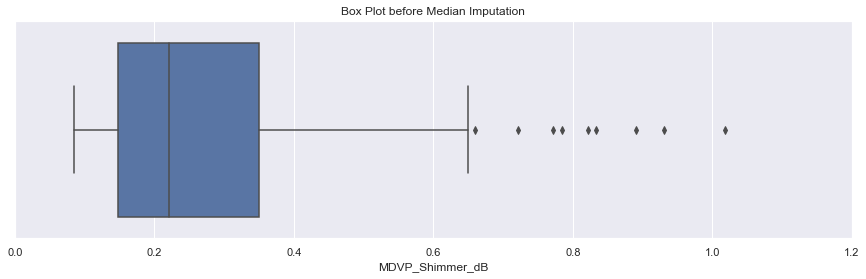

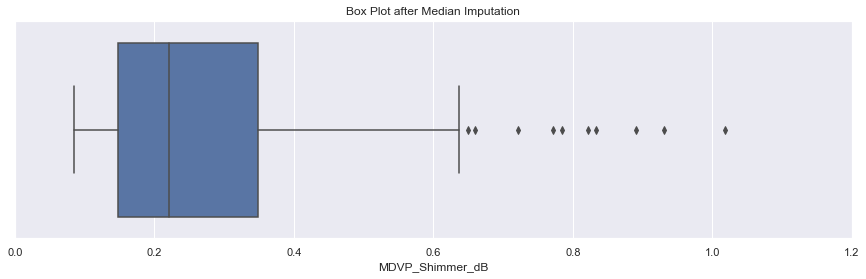

In [30]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= df_copy.MDVP_Shimmer_dB)
plt.xlim([0,1.2])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df_copy.MDVP_Shimmer_dB.quantile(0.1)
q3 = df_copy.MDVP_Shimmer_dB.quantile(0.9)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_copy.MDVP_Shimmer_dB)
for i in df_copy.MDVP_Shimmer_dB:
    if i > Upper_tail or i < Lower_tail:
            df_copy.MDVP_Shimmer_dB = df_copy.MDVP_Shimmer_dB.replace(i, med)
sns.boxplot(x= df_copy.MDVP_Shimmer_dB)
plt.xlim([0,1.2])
plt.title("Box Plot after Median Imputation")
plt.show() 

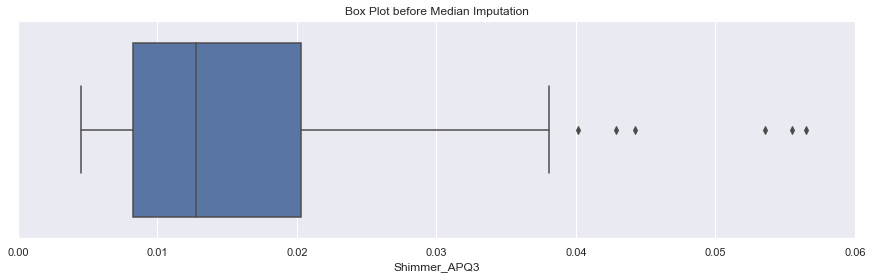

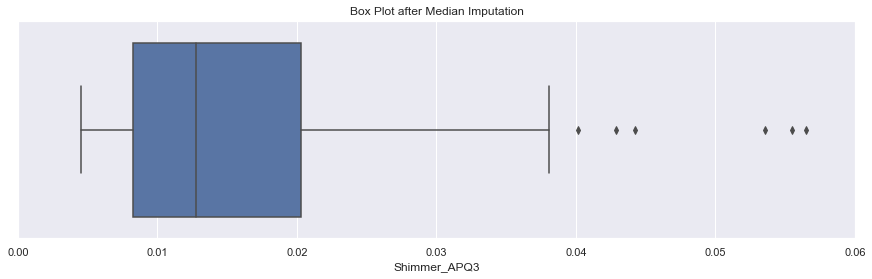

In [31]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= df_copy.Shimmer_APQ3)
plt.xlim([0,0.06])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df_copy.Shimmer_APQ3.quantile(0.1)
q3 = df_copy.Shimmer_APQ3.quantile(0.9)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_copy.Shimmer_APQ3)
for i in df_copy.Shimmer_APQ3:
    if i > Upper_tail or i < Lower_tail:
            df_copy.Shimmer_APQ3 = df_copy.Shimmer_APQ3.replace(i, med)
sns.boxplot(x= df_copy.Shimmer_APQ3)
plt.xlim([0,0.06])
plt.title("Box Plot after Median Imputation")
plt.show() 

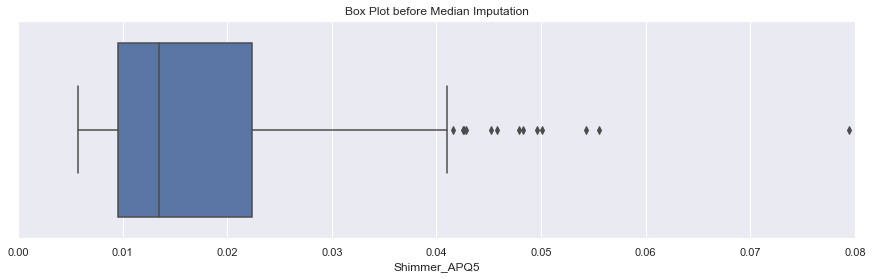

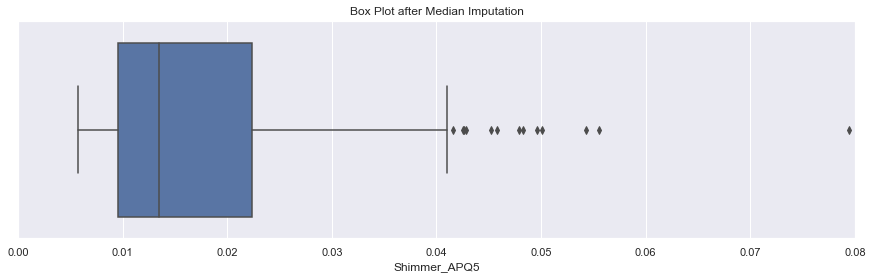

In [32]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= df_copy.Shimmer_APQ5)
plt.xlim([0,0.08])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df_copy.Shimmer_APQ5.quantile(0.1)
q3 = df_copy.Shimmer_APQ5.quantile(0.9)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_copy.Shimmer_APQ5)
for i in df_copy.Shimmer_APQ5:
    if i > Upper_tail or i < Lower_tail:
            df_copy.Shimmer_APQ5 = df_copy.Shimmer_APQ5.replace(i, med)
sns.boxplot(x= df_copy.Shimmer_APQ5)
plt.xlim([0,0.08])
plt.title("Box Plot after Median Imputation")
plt.show() 

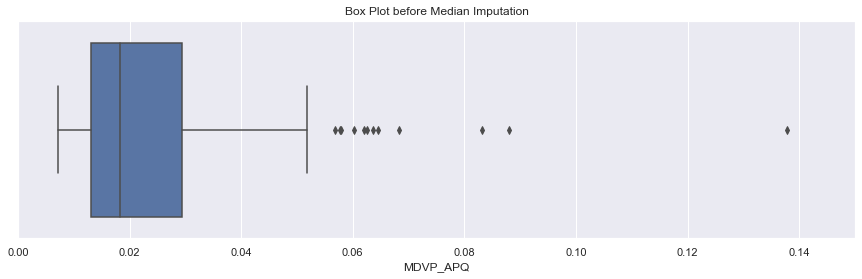

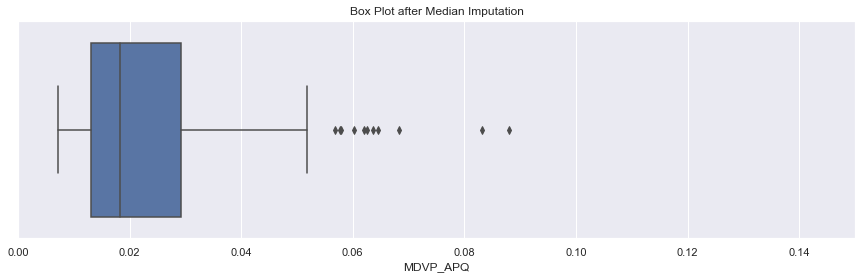

In [33]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= df_copy.MDVP_APQ)
plt.xlim([0,0.150])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df_copy.MDVP_APQ.quantile(0.1)
q3 = df_copy.MDVP_APQ.quantile(0.9)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_copy.MDVP_APQ)
for i in df_copy.MDVP_APQ:
    if i > Upper_tail or i < Lower_tail:
            df_copy.MDVP_APQ = df_copy.MDVP_APQ.replace(i, med)
sns.boxplot(x= df_copy.MDVP_APQ)
plt.xlim([0,0.150])
plt.title("Box Plot after Median Imputation")
plt.show() 

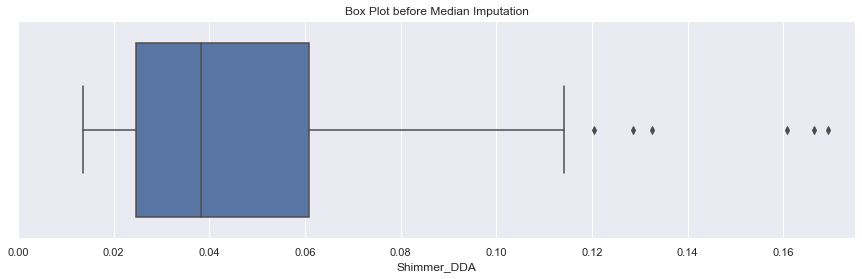

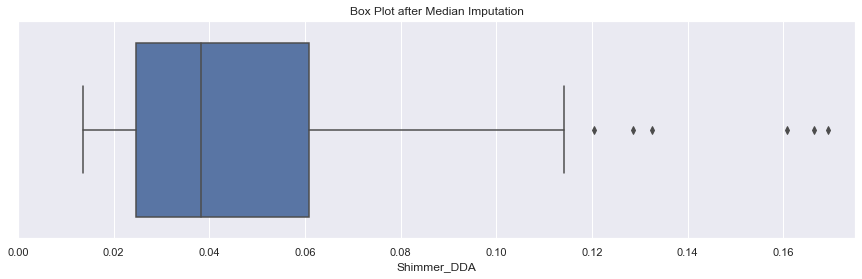

In [34]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= df_copy.Shimmer_DDA)
plt.xlim([0,0.175])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df_copy.Shimmer_DDA.quantile(0.1)
q3 = df_copy.Shimmer_DDA.quantile(0.9)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_copy.Shimmer_DDA)
for i in df_copy.Shimmer_DDA:
    if i > Upper_tail or i < Lower_tail:
            df_copy.Shimmer_DDA = df_copy.Shimmer_DDA.replace(i, med)
sns.boxplot(x= df_copy.Shimmer_DDA)
plt.xlim([0,0.175])
plt.title("Box Plot after Median Imputation")
plt.show() 

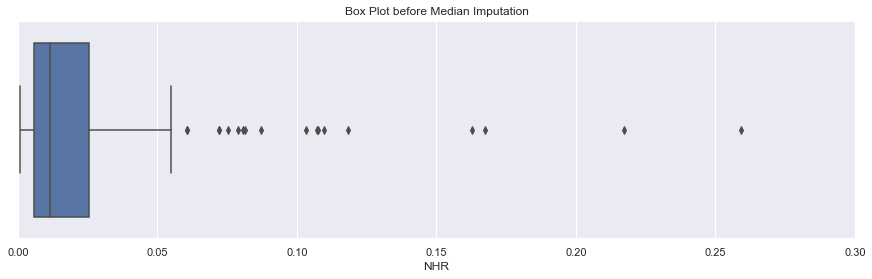

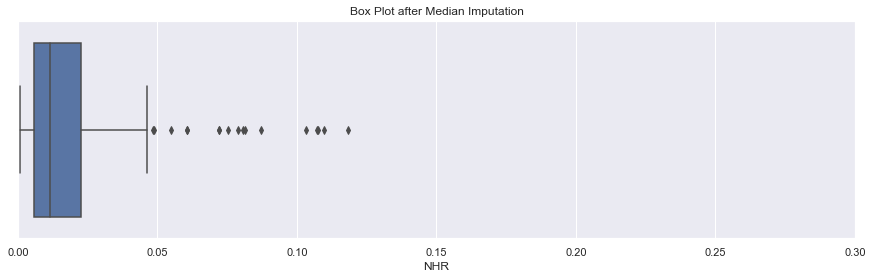

In [35]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= df_copy.NHR)
plt.xlim([0,0.3])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df_copy.NHR.quantile(0.1)
q3 = df_copy.NHR.quantile(0.9)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_copy.NHR)
for i in df_copy.NHR:
    if i > Upper_tail or i < Lower_tail:
            df_copy.NHR = df_copy.NHR.replace(i, med)
sns.boxplot(x= df_copy.NHR)
plt.xlim([0,0.3])
plt.title("Box Plot after Median Imputation")
plt.show() 

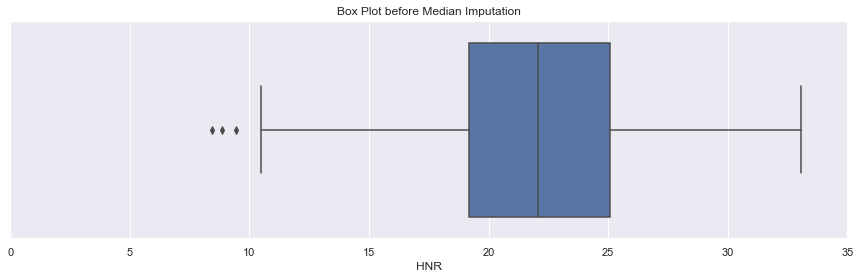

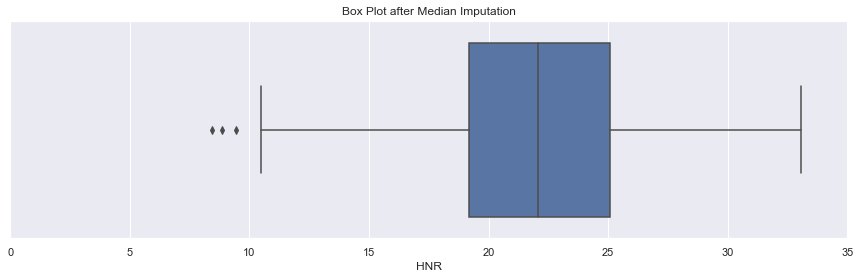

In [36]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= df_copy.HNR)
plt.xlim([0,35])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df_copy.HNR.quantile(0.1)
q3 = df_copy.HNR.quantile(0.9)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_copy.HNR)
for i in df_copy.HNR:
    if i > Upper_tail or i < Lower_tail:
            df_copy.HNR = df_copy.HNR.replace(i, med)
sns.boxplot(x= df_copy.HNR)
plt.xlim([0,35])
plt.title("Box Plot after Median Imputation")
plt.show() 

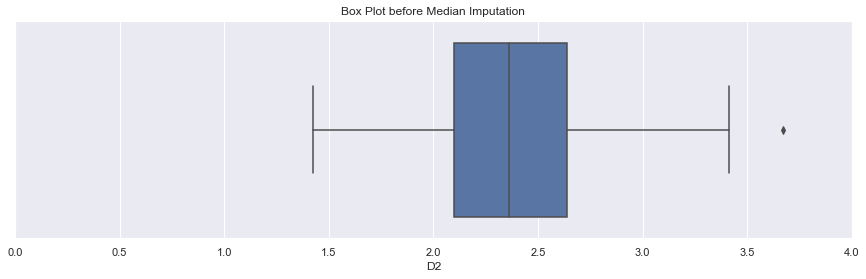

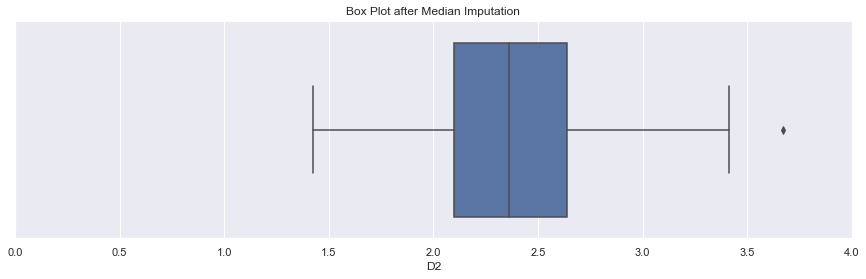

In [37]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= df_copy.D2)
plt.xlim([0,4])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df_copy.D2.quantile(0.1)
q3 = df_copy.D2.quantile(0.9)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_copy.D2)
for i in df_copy.D2:
    if i > Upper_tail or i < Lower_tail:
            df_copy.D2 = df_copy.D2.replace(i, med)
sns.boxplot(x= df_copy.D2)
plt.xlim([0,4])
plt.title("Box Plot after Median Imputation")
plt.show() 

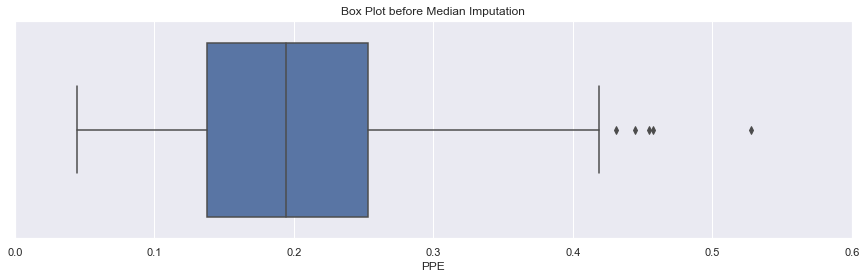

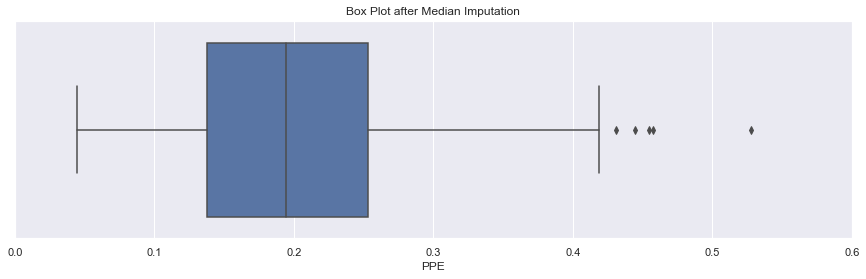

In [38]:
sns.set_theme(style="darkgrid")

sns.boxplot(x= df_copy.PPE)
plt.xlim([0,0.6])
plt.title("Box Plot before Median Imputation")
plt.show()

q1 = df_copy.PPE.quantile(0.1)
q3 = df_copy.PPE.quantile(0.9)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df_copy.PPE)
for i in df_copy.PPE:
    if i > Upper_tail or i < Lower_tail:
            df_copy.PPE = df_copy.PPE.replace(i, med)
sns.boxplot(x= df_copy.PPE)
plt.xlim([0,0.6])
plt.title("Box Plot after Median Imputation")
plt.show() 

In [99]:
x = df_copy.drop('status', axis=1)
y = df_copy["status"]

X = df_copy.drop(['status','MDVP_Jitter_Abs','MDVP_PPQ','Jitter_DDP','MDVP_Shimmer_dB','Shimmer_APQ3','Shimmer_APQ5','MDVP_APQ','Shimmer_DDA','RPDE','MDVP_Flo'], axis=1)
y = df_copy["status"]

In [100]:
scaler = MinMaxScaler()
X = scaler.fit_transform(x)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
print("Size of training set: ",X_train.shape)
print("Size of test set: ",X_test.shape)


Size of training set:  (156, 22)
Size of test set:  (39, 22)


In [103]:
dt = DecisionTreeClassifier(criterion='gini',random_state = 120, max_depth=3)
dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)

print(classification_report(y_test, y_pred_dt))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))

print("Train Accuracy : ", dt.score(X_train,y_train)*100)
print("Test Accuracy : ", dt.score(X_test,y_test)*100)

              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77         7
         1.0       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39

Accuracy: 0.9230769230769231
Precision: 0.9393939393939394
Recall: 0.96875
Train Accuracy :  97.43589743589743
Test Accuracy :  92.3076923076923


c:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


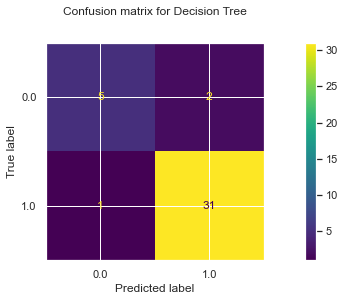

In [104]:
plot_confusion_matrix(dt, X_test, y_test) 
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.show()

In [110]:

from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)


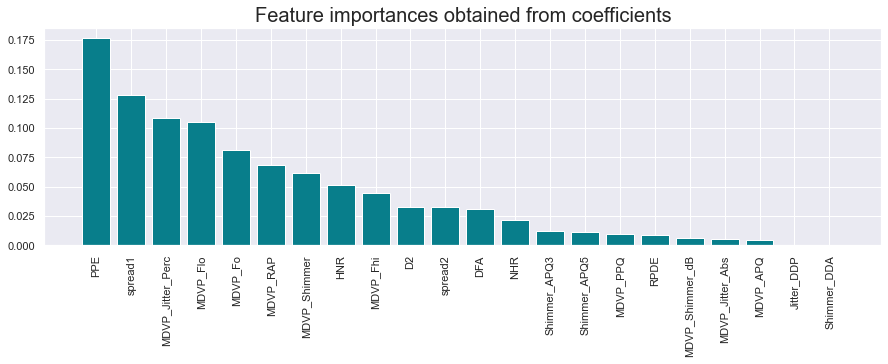

In [111]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [106]:
rf =RandomForestClassifier(n_estimators=50, random_state=42,max_depth=4)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))


print("Train Accuracy : ", rf.score(X_train,y_train)*100)
print("Test Accuracy : ", rf.score(X_test,y_test)*100)

              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83         7
         1.0       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

Accuracy: 0.9487179487179487
Precision: 0.9411764705882353
Recall: 1.0
Train Accuracy :  98.71794871794873
Test Accuracy :  94.87179487179486


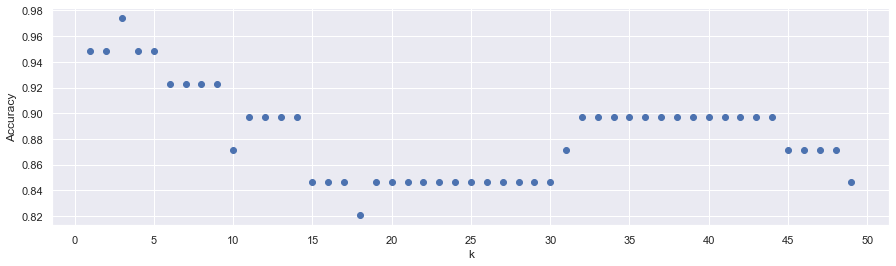

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
acc=[]
roc=[]
scores = []
k_range = range(1, 50)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k') # x axis label
plt.ylabel('Accuracy') # y axis label
plt.scatter(k_range, scores) # scatter plot
plt.xticks([0, 5, 10, 15, 20, 25,30,35,40,45,50]);

In [108]:
# using k-Nearest Neighbour (KNN) classifier
# choose 3 as the optimal k
classifierKNN = KNeighborsClassifier(n_neighbors = 3)
classifierKNN.fit(X_train,y_train)

y_pred = classifierKNN.predict(X_test)
y_prob = classifierKNN.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)


print(classification_report(y_test, y_pred))

# using accuracy performance metric
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, classifierKNN.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92         7
         1.0       0.97      1.00      0.98        32

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39

Train Accuracy:  0.9807692307692307
Test Accuracy:  0.9743589743589743


In [109]:
clf1=SVC(kernel='linear',C= 0.2,probability=True)
clf1.fit(X_train,y_train)
y_predSVM=clf1.predict(X_test)

print(classification_report(y_test, y_predSVM))
cms = confusion_matrix(y_test, y_predSVM)

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, clf1.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predSVM))

              precision    recall  f1-score   support

         0.0       0.75      0.43      0.55         7
         1.0       0.89      0.97      0.93        32

    accuracy                           0.87        39
   macro avg       0.82      0.70      0.74        39
weighted avg       0.86      0.87      0.86        39

Train Accuracy:  0.8525641025641025
Test Accuracy:  0.8717948717948718
